<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
%pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [ ]:
# Loading the dataset into a pandas df
df = pd.read_csv(path, header=None)

# Displaying the first 10 rows of the df
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


Add the headers to the dataframe, as mentioned in the project scenario. 


In [ ]:
columns = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df = pd.read_csv(path, header=None, names=columns)

Now, replace the '?' entries with 'NaN' values.


In [ ]:
df.replace('?', np.nan, inplace=True)
print(df.head(10))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520
5  31       1  25.740               0    NaN       4   3756.62160
6  46       1  33.440               1      0       4   8240.58960
7  37       1  27.740               3      0       1   7281.50560
8  37       2  29.830               2      0       2   6406.41070
9  60       1  25.840               0      0       1  28923.13692


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce') 
df['age'].fillna(df['age'].mean(), inplace=True)

df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
df['charges'].fillna(df['charges'].mean(), inplace=True)

df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)
df['region'].fillna(df['region'].mode()[0], inplace=True)

df['gender'] = df['gender'].astype(int)
df['no_of_children'] = df['no_of_children'].astype(int)
df['smoker'] = df['smoker'].astype(int)
df['region'] = df['region'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 151.7 KB


/var/folders/gs/yllxycxn6m72l4z4l69nj54r0000gn/T/ipykernel_17393/739283487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/var/folders/gs/yllxycxn6m72l4z4l69nj54r0000gn/T/ipykernel_17393/739283487.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [ ]:
df['charges'] = df['charges'].round(2)

print(df.head())

    age  gender     bmi  no_of_children  smoker  region   charges
0  19.0       1  27.900               0       1       3  16884.92
1  18.0       2  33.770               1       0       4   1725.55
2  28.0       2  33.000               3       0       4   4449.46
3  33.0       2  22.705               0       0       1  21984.47
4  32.0       2  28.880               0       0       1   3866.86


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


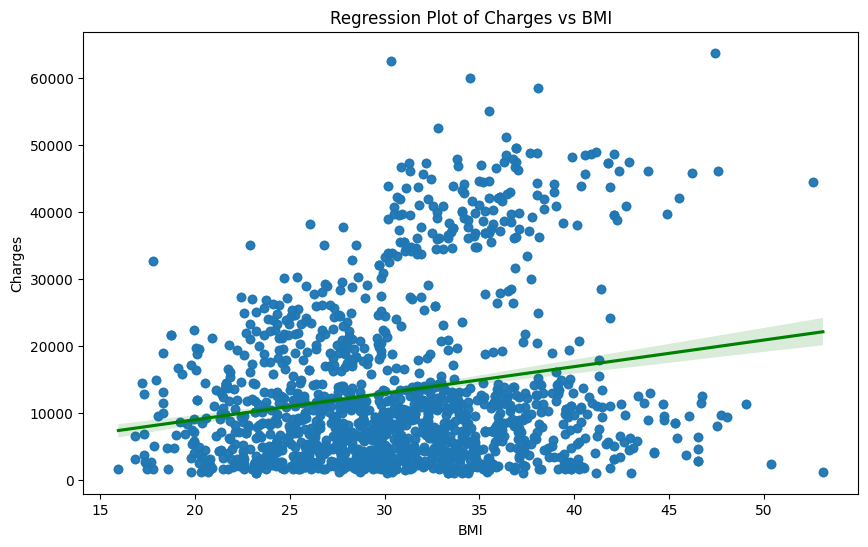

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'green'})
plt.title('Regression Plot of Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Implement the box plot for `charges` with respect to `smoker`.


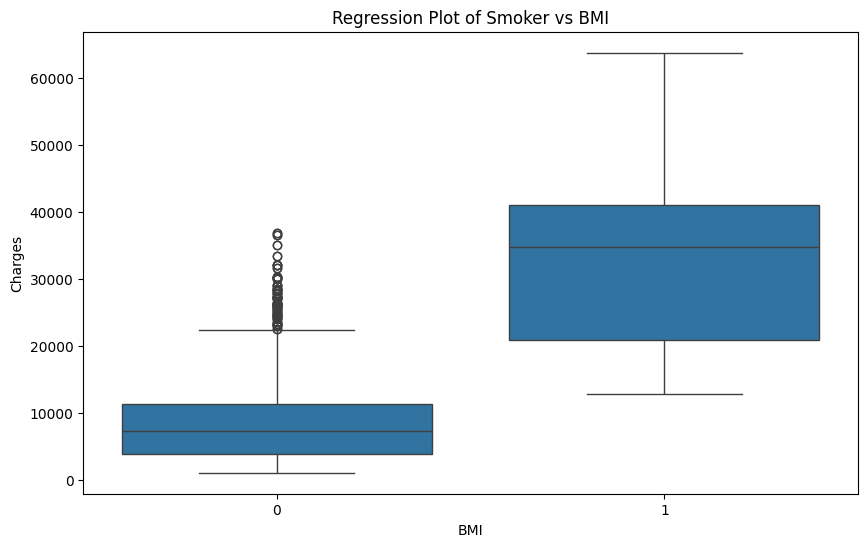

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Regression Plot of Smoker vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Print the correlation matrix for the dataset.


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026041  0.113045        0.037585 -0.023285   
gender         -0.026041  1.000000  0.042924        0.016020  0.082326   
bmi             0.113045  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037585  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023285  0.082326  0.011489        0.006362  1.000000   
region         -0.007175  0.022213  0.271119       -0.025717  0.054077   
charges         0.298622  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007175  0.298622  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [ ]:
X_smoker = df[['smoker']]
y = df['charges']

X_train_smoker, X_test_smoker, y_train, y_test = train_test_split(X_smoker, y, test_size=0.2, random_state=1)

model_smoker = LinearRegression()
model_smoker.fit(X_train_smoker, y_train)


y_pred_smoker = model_smoker.predict(X_test_smoker)

r2_score_smoker = r2_score(y_test, y_pred_smoker)
print(f"R^2 score for model using 'smoker' attribute: {r2_score_smoker:.4f}")


R^2 score for model using 'smoker' attribute: 0.5991


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [ ]:
X = df.drop(columns=['charges']) 

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=1)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

y_pred_all = model_all.predict(X_test_all)

r2_score_all = r2_score(y_test_all, y_pred_all)
print(f"R^2 score for model using all attributes: {r2_score_all:.4f}")

R^2 score for model using all attributes: 0.7396


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [ ]:
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Standardize the data
    ('poly', PolynomialFeatures(degree=2)),  # Step 2: Add polynomial features (degree 2)
    ('linreg', LinearRegression())           # Step 3: Fit a linear regression model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculating and printing the R^2 score
r2_score_pipeline = r2_score(y_test, y_pred)
print(f"R^2 score for the pipeline model: {r2_score_pipeline:.4f}")

R^2 score for the pipeline model: 0.7837


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [ ]:
ridge_model = Ridge(alpha=0.1)

# Fitting the model using the training data
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

# Calculating and printing the R^2 score for the testing data
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 score for Ridge regression model: {r2_score_ridge:.4f}")

R^2 score for Ridge regression model: 0.6761


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 
ridge_poly_model = Ridge(alpha=0.1)

ridge_poly_model.fit(X_train_poly, y_train)

y_pred_ridge_poly = ridge_poly_model.predict(X_test_poly)

r2_score_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
print(f"R^2 score for Ridge regression model with polynomial features (degree=2): {r2_score_ridge_poly:.4f}")

R^2 score for Ridge regression model with polynomial features (degree=2): 0.7836


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
